In [187]:
%reload_ext autoreload
%autoreload 2

# 1: Excitons
_Kevin Vonk, s1706896, Feb 2020_

### Section 1: Laying the groundwork

#### a)
The solution to the 1D eigenvalue problem of the harmonic oscillator is

$$E_n=\left(n+\frac{1}{2}\right)\hbar\omega; n = 0, 1, 2, ...$$

Fortunately, comparing this to the 3D solution is rather straightforward. Making use of the fact that the solution of the 3D Schrödinger equation can be seperated into three independent 1D solutions, we can write the 3D eigenvalue as follows:

$$
\begin{equation*}
\label{eq:3d_eigenvalue} \tag{1}
E_{n_x,n_y,n_z} = \left[\left(n_x+\frac{1}{2}\right) + \left(n_y+\frac{1}{2}\right) + \left(n_z+\frac{1}{2}\right)\right]\hbar\omega.
\end{equation*}
$$

Writing $n = n_x + n_y + n_z$, we can rewrite eq. $\eqref{eq:3d_eigenvalue}$ as:

$$E_n = \left(n + \frac{3}{2}\right)\hbar\omega,$$

which is the energy we would expect for a 3D harmonic oscillator.

#### b)
Noting again that

$$
\begin{aligned}
n &= n_x + n_y + n_z \\
n - n_x &= n_y + n_z,
\end{aligned}
$$

if $n$ and $n_x$ are given, choosing a value for either $n_y$ or $n_z$ determines the other. This means that there are $n - n_x + 1$ different combinations of pairs of $n_y$ and $n_z$. For the degeneracy then, we have

$$
\begin{aligned}
\sum_{n_x = 0}^n\left(n - n_x + 1\right) &= \sum_{n_x = 0}^n\left(n+1\right) + \sum_{n_x = 0}^n n_x \\
&= \left(n+1\right)^2 - \frac{1}{2}n\left(n+1\right) \\
&= \frac{1}{2}\left(n+1\right)\left(2n+2 - n\right) \\
&= \frac{1}{2}\left(n+1\right)\left(n+2\right),
\end{aligned}
$$

which is the expected degeneracy.

#### c)

Introducing the dimensionless parameters $\rho = \frac{r}{r_0}$ and $\lambda = \frac{E}{V_0}$, where $r_0 = \frac{\hbar}{\sqrt{2\mu V_0}}$ and $V_0 = \hbar\omega$, we can write the (radial) Schrödinger equation in dimensionless form. Starting from the radial Schrödinger equation,

$$
\begin{equation}
    \left(-\frac{\hbar^2}{2\mu}\frac{d^2}{dr^2}+\frac{\hbar^2l(l+1)}{2\mu r^2}+V(r)\right)\zeta(r) = E\zeta(r),
\end{equation}
$$

which can be divided by $V_0$ to obtain

$$
\left(-\frac{\hbar^2}{2\mu V_0}\frac{d^2}{dr^2} + \frac{\hbar^2 l(l+1)}{2\mu r^2 V_0} + \frac{V(r)}{V_0}\right)\zeta(r) = \frac{E}{V_0}\zeta(r).
$$

Replacing expressions with the dimensionless parameters and changing $r \rightarrow \rho$, we obtain

$$
\begin{aligned}
    \left[-(r_0)^2 \frac{d^2}{dr^2} + \frac{l(l+1)}{\rho^2} + \frac{V(r)}{V_0}\right]\zeta(r) &= \lambda\zeta(r) \\
    \left[-(r_0)^2 \frac{d^2\rho}{dr^2}\frac{d^2}{d\rho^2} + \frac{l(l+1)}{\rho^2} + \frac{V(\rho)}{V_0}\right]\zeta(\rho) &= \lambda\zeta(\rho) \\
    \left[-\frac{d^2}{d\rho^2} + \frac{l(l+1)}{\rho^2} + \frac{V(\rho)}{V_0}\right]\zeta(\rho) &= \lambda\zeta(\rho)
\end{aligned},
$$

which can be written in a more suggestive form,

$$
\begin{equation}
    \label{eq:dimless_schr}\tag{2}
    \frac{d^2}{d\rho^2}\zeta(\rho) = \left(W(\rho)-\lambda\right)\zeta(\rho),
\end{equation}
$$

where

$$
\begin{equation}
    \label{eq:w}\tag{3}
    W(\rho) = \frac{l(l+1)}{\rho^2} + \frac{V(\rho)}{V_0}.
\end{equation}
$$

In order to determine the outer turning point (OTP), we must solve $W(\rho) - \lambda = 0$. Filling in $V(\rho)$ and applying some algebra, we must solve
$$
\begin{equation}
    \label{eq:otp}\tag{4}
    \frac{l(l+1)}{\rho^2}+\frac{1}{4}\rho^2 - \lambda_n = 0 \quad \text{with} \; n = 2k + l.
\end{equation}
$$

In the cases where $l \neq 0$, $\lambda$ is a function of $l$, which means that deriving an analytical expression for the OTP as a function of $\lambda$ is cumbersome. In these instances we can programatically calculate the OTP by calculating eq. $\eqref{eq:otp}$ for every point $\rho_i$ of a grid. The OTP is the point where the sign of the solution has changed. In the case that $l = 0$ however, we can simplify eq. $\eqref{eq:otp}$ as

$$
\frac{1}{4}\rho^2 - \lambda_n = 0, \\
\rho_{otp} = 2\sqrt{\lambda_n},
$$

which shows that for the given potential, the position of the OTP increases with the root of the energy. A plot of this function follows.

Text(0, 0.5, '$\\rho$')

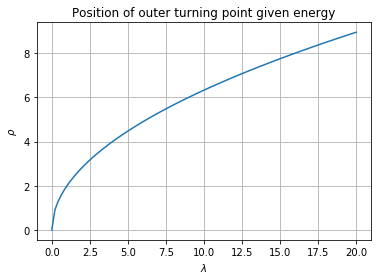

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from excitons import *

lambda_ = np.linspace(0, 20, 100)
pot = HarmonicPotential()
otp = [pot.outerTurningPoint(i) for i in lambda_]

plt.plot(lambda_, otp)
plt.grid()
plt.title("Position of outer turning point given energy")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\rho$")

#### d)

In order to compare any computed wavefunction, it pays to compare it to the analytical solution. The solution is given by the assignment sheet as follows,

$$
\zeta_{k,r}(r) = A_{kl}r^{l+1}e^{-\nu r^2}L_k^{(l+\frac{1}{2})}(2\nu r^2); \quad \text{with} \; \nu = \frac{\mu\omega}{2\hbar}.
$$

Rewriting in dimensionless form using the parameters for the harmonic oscillator, we obtain

$$
\zeta_{k,r}(\rho) = A_{kl}\left(\rho r_0\right)^{l+1}e^{-\frac{1}{4}\rho^2}L_k^{(l+\frac{1}{2})}\left(\frac{1}{2}\rho^2\right).
$$

Since $(r_0)^{l+1}$ is constant for a given $l$, we can merge this with the constant $A_{kl}$ to obtain the analytical solution of the wavefunction for the harmonic potential in dimensionless parameters:

$$
\zeta_{k,r}(\rho) = A_{kl}\left(\rho\right)^{l+1}e^{-\frac{1}{4}\rho^2}L_k^{(l+\frac{1}{2})}\left(\frac{1}{2}\rho^2\right).
$$

Next, we define the grid parameters. In the case that $l=0$, the first term in $W$ (eq. $\eqref{eq:w}$) drops out. This allows us to pick any value for $a$, since $\rho$ can take on any (positive) value. Let us then pick the easiest and most trivial point for this offset, $a=0$. When $l\neq0$, this first term does not drop out, which means that $a\neq0$. Otherwise, division by zero would occur. We will define an appropriate offset value when we come across situations where $l\neq0$. 
A requirement for $\zeta$ is that $\zeta \rightarrow 0$ for $\rho \rightarrow \inf$. By plotting $\zeta$ for large $\rho$, we were able to determine that for $\rho = 10$, $\zeta \approx 0$. This means that $\rho \in [0,10]$.
Lastly, we need a definition for the number of grid points for our computed solution. Given is the error $\epsilon < 3 * 10^{-4}$. Using trial and error, we are able to calculate the error for any number of grid points. Using this method, we were able to determine that 190 grid points, which are 189 steps, are optimal for the required accuracy.
Combining all the observations and restrictions, we are able to define the grid

$$
\rho = a + jh \quad \text{where} \; j = 0, 1, ..., N
$$

using $a = 0$, $N = 189$ and $h \approx 0,05291 $. A plot of the numerical and analytical wave functions, as well as the error between them for the defined grid is found below:

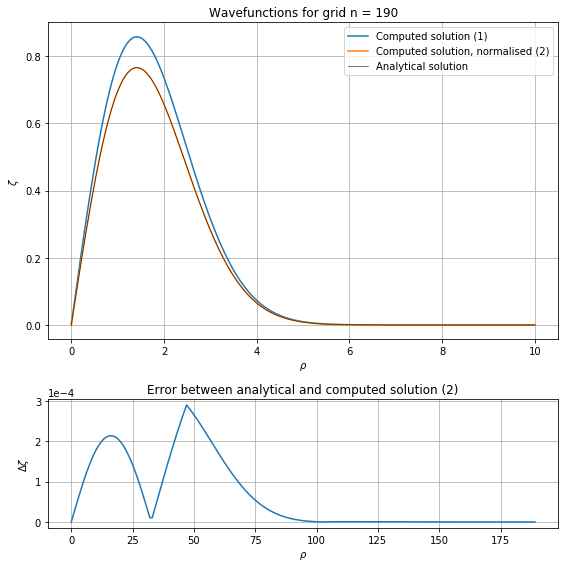

In [189]:
# Setup the grid, potential and wave functions
grid = Grid(190)
pot = HarmonicPotential()
wf_not_normalised = WaveFunction(grid, pot)
wf = WaveFunction(grid, pot)
ana = WaveFunction(grid, pot)

# Calculate and normalise the wave functions
wf_not_normalised.propagate(3/2)
wf.propagate(3/2)
wf.normalise()
ana.analytical()
ana.normalise()

legend = ("Computed solution (1)", "Computed solution, normalised (2)")

plot(grid, ana, wf_not_normalised, wf, legend=legend, err_index=1)

As we can observe from the error plot, at the OTP there exists a discontinuity. This is to be expected: we arrive at this point using two different boundary functions, and only ensure that at the OTP the value of both the foward and backward propagation are the same. This is the best we can do however, since the derivatives of both propagations needn't be the same.

### Section 2: Applying improvements

#### a)

Numerov's method is a mathematical trick which allows us to improve the accuracy of our computations without the cost normally associated with such improvements. Numerov's method is only applicable in very select cases, but our problem turns out to be exactly such a case. Following par. 1.5 of the lecture notes, we start with the general form of Numerov's method,

$$
\begin{equation}
    \label{eq:numerov}\tag{5}
    \frac{d^2f}{dx^2} = g(x)f(x).
\end{equation}
$$

We can rewrite this using the functions and variables of our problem, giving

$$
\frac{d^2\zeta}{d\rho^2} = \left(W(\rho) - \lambda\right)\zeta(\rho),
$$

where $f(\rho) = \zeta(\rho)$ and $g(\rho) = W(\rho) - \lambda$. We can rewrite the ODE as shown in eq. (24) of the lecture notes,

$$
h^2\frac{d^2\zeta}{d\rho^2} = f(\rho + h)q(\rho + h) - 2f(\rho)q(\rho) + f(\rho - h)q(\rho - h),
$$

where $q(\rho) = 1 - \frac{h^2}{12}g(\rho)$. If we replace the differential with eq. $\eqref{eq:numerov}$ and the given definitions for $f(\rho)$ and $g(\rho)$, we obtain

$$
h^2\left(W(\rho) - \lambda\right)\zeta(\rho) = \zeta(\rho + h)q(\rho + h) - 2\zeta(\rho)q(\rho) + \zeta(\rho - h)q(\rho - h).
$$

We are able to rewrite this eq. in such a way that we can extract both the forward $\left(\zeta(\rho + h)\right)$ and backward $\left(\zeta(\rho - h)\right)$ propagations, which become

$$
\zeta(\rho + h) = \frac{1}{q(\rho + h)}\left[h^2(W(\rho) - \lambda)\zeta(\rho)+ 2\zeta(\rho)q(\rho) - \zeta(\rho - h)q(\rho - h)\right], \\

\zeta(\rho - h) = \frac{1}{q(\rho - h)}\left[h^2(W(\rho) - \lambda)\zeta(\rho)+ 2\zeta(\rho)q(\rho) - \zeta(\rho + h)q(\rho + h)\right].
$$

Having implemented Numerov's method, taking the same grid parameters as defined in 1d) gives us the following plot:

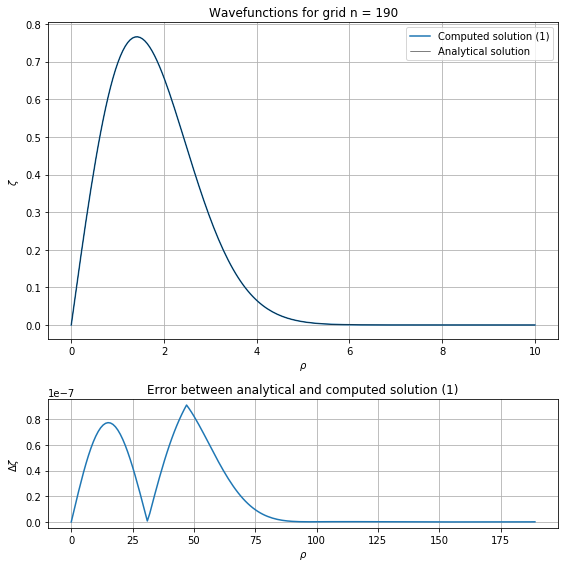

In [190]:
wf.propagate(3/2, numerov=True)
wf.normalise()

plot(grid, ana, wf)

We can see that the accuracy has improved from $\sim 3*10^{-4}$ to $\sim 1 * 10^{-7}$, an order of $10^3$ improvement. This means that we can increase our accuracy whilst having the same grid using Numerov's method, or we can decrease the amount of grid points to obtain the same required accuracy. Let us now redefine our grid using Numerov's method, aiming for an accuracy of $\epsilon = 3 * 10^{-4}$ again. There is no reason to redefine the limits of the grid, since Numerov's method does not influence these. We can also state that the limits are large enough, such that any edge effects are much smaller than the requested accuracy. In the case where $\rho_{max} = 8$ for example, Numerov's method introduces a deviation from the analytical solution near this limit, which dominates the accuracy of the numerical solution. Using trial and error, we were able to determine that a grid consisting of 27 grid points (26 steps) falls within the required accuracy. This then redefines $N = 26$ and $h=0,3846$, which is a huge increase in step size compared to 1d). The plot for this grid can be found below.

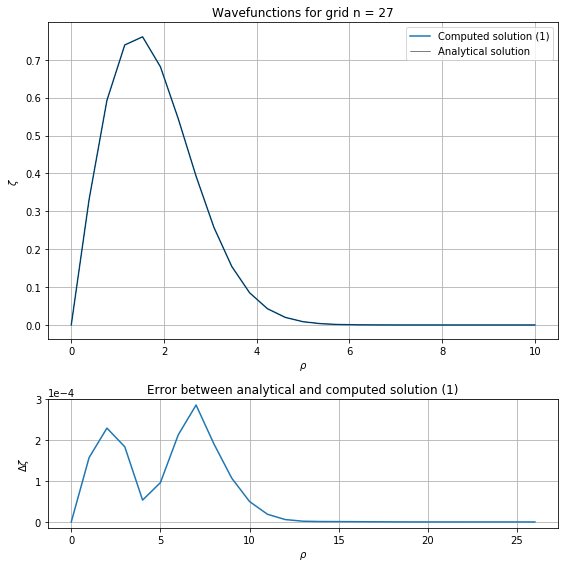

In [191]:
# Setup the grid, potential and wave functions
grid = Grid(27)
pot = HarmonicPotential()
wf = WaveFunction(grid, pot)
ana = WaveFunction(grid, pot)

# Calculate and normalise the wave functions
wf.propagate(3/2, numerov=True)
wf.normalise()
ana.analytical()
ana.normalise()

plot(grid, ana, wf)

#### b)


[0.58335065 0.58055431 0.57775838]
[0.57583248 0.58055431 0.58527655]

[0.49101608 0.48702593 0.48303596]
[0.48303596 0.48702593 0.49101608]

F=-0.007980114367302449; Fleft=-0.011369965969889595
[0.49101608 0.48702593 0.48303596]
[0.48303596 0.48702593 0.49101608]

[0.43666517 0.43204868 0.42743232]
[0.42849409 0.43204868 0.4356034 ]

F=-0.006047541537019974; Fleft=-0.007980114367302449
[0.43666517 0.43204868 0.42743232]
[0.42849409 0.43204868 0.4356034 ]

[0.40718467 0.40224909 0.39731364]
[0.39893217 0.40224909 0.40556614]

F=-0.00501545231266709; Fleft=-0.006047541537019974
[0.40718467 0.40224909 0.39731364]
[0.39893217 0.40224909 0.40556614]

[0.39183853 0.38674224 0.38164608]
[0.38354946 0.38674224 0.38993516]

F=-0.004482322092554947; Fleft=-0.00501545231266709
[0.39183853 0.38674224 0.38164608]
[0.38354946 0.38674224 0.38993516]

[0.38149068 0.37631286 0.37113541]
[0.37319168 0.37631286 0.3794344 ]

F=-0.0041864541805001765; Fleft=-0.004482322092554947
[0.38149068 0.37631286 0.3

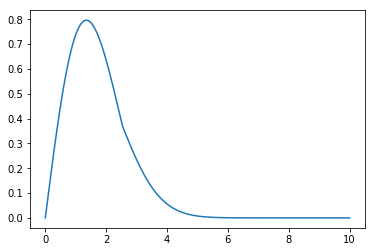

In [193]:
grid = Grid(1000)
solver = Solver(grid, pot)
print(solver.bisect(1.4, 1.6, fullreturn=True))

plt.plot(grid, solver.wf)